# Signal/Background Classification using Boosted Decision Trees

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

seed = 1234
np.random.seed(seed)

In [3]:
import os
print(os.getcwd())

/teamspace/studios/this_studio/BDT


## 1. Data Loading

In [35]:
signal = pd.read_csv('/teamspace/studios/this_studio/Preprocessing Eflow Images/data/dataset3/sig_btagged2jets.txt', sep = '\t')
background = pd.read_csv('/teamspace/studios/this_studio/Preprocessing Eflow Images/data/dataset3/bg_btagged2jets.txt', sep = '\t')

In [36]:
signal.head()

,eventno,jetmultiplicity,axion_Eta,axion_Phi,axion_pT,axion_Px,axion_Py,axion_Pz,axion_E,Z_Eta,...,isophoton_Pz,isophoton_E,jet1_btag,jet2_btag,jet3_btag,jet4_btag,invmass_2j1p,delta_eta_jet1_jet2,delta_phi_jet1_jet2,deltaR_jet1_jet2
0,228,2,-0.034237,-0.864124,44.4921,28.8890,-33.8375,-1.52359,63.3008,0.626346,...,8.15751,38.6899,1,1,0,0,90.217625,0.100643,1.524951,1.528268
1,436,2,1.385930,0.331321,34.5022,32.6258,11.2233,64.66500,85.9530,4.751210,...,43.61580,55.1083,1,1,0,0,86.379330,0.611792,-1.761031,1.864275
2,541,2,-0.961386,-0.893333,31.1332,19.5149,-24.2579,-34.75960,64.8188,-2.760710,...,-51.77440,63.3654,1,1,0,0,104.956134,-0.172527,1.894769,1.902607
3,697,2,-0.682404,-2.496180,35.2896,-28.1911,-21.2278,-25.99480,62.8182,-2.181670,...,-76.57120,77.9121,1,1,0,0,89.161722,-0.891442,1.682195,1.903799
4,1344,2,2.551010,-2.732630,31.3965,-28.8073,-12.4849,200.02700,207.4140,3.803630,...,34.83620,45.8901,1,1,0,0,96.848533,-0.397550,1.805895,1.849136


In [37]:
signal['event_label'] = 1
background['event_label'] = 0

In [38]:
data = pd.concat([signal, background], axis = 0)

In [39]:
## Shuffling the data
data = data.sample(frac=1, random_state=seed)

In [40]:
data.head()

,eventno,jetmultiplicity,axion_Eta,axion_Phi,axion_pT,axion_Px,axion_Py,axion_Pz,axion_E,Z_Eta,...,isophoton_E,jet1_btag,jet2_btag,jet3_btag,jet4_btag,invmass_2j1p,delta_eta_jet1_jet2,delta_phi_jet1_jet2,deltaR_jet1_jet2,event_label
60,15666,2,-0.207340,1.892560,50.9403,-16.109200,48.3260,-10.6378,68.7955,-0.221685,...,35.9266,1,1,0,0,99.938483,0.403559,1.289760,1.351422,1
915,295843,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.8629,1,1,0,0,78.949527,1.030685,2.496431,2.700830,0
1136,369647,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81.1519,1,1,0,0,294.597141,-1.553171,1.685836,2.292244,0
162,35495,2,-1.714200,-0.367467,29.6465,27.667300,-10.6506,-79.6326,96.1516,-3.038560,...,41.3000,1,1,0,0,74.965845,0.337200,1.945989,1.974988,1
409,91914,2,-0.734937,1.594940,26.0536,-0.628919,26.0460,-20.9186,56.0479,-1.763220,...,51.4611,1,1,0,0,94.450713,0.261456,2.198675,2.214166,1


In [41]:
features_col = ['isophoton_E', 'isophoton_pT', 'invmass_2j1p', 'deltaR_jet1_jet2']


X, y = data.loc[:,features_col].values, data.loc[:,'event_label'].values.astype(int)

## 2. Train Test Split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
param_grid_forest = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 20]
}
grid_search_forest = GridSearchCV(RandomForestClassifier(random_state=seed),
                          param_grid=param_grid_forest,
                          cv=5,
                          n_jobs=-1)

In [45]:
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1234),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [50, 100, 200, 300, 500]})

Best Model Test Accuracy: 0.82
Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 20, 'n_estimators': 100}
ROC AUC: 0.89


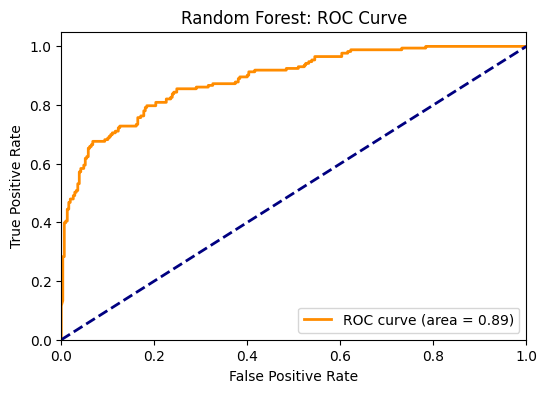

In [46]:
best_model = grid_search_forest.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # Get the probability of the positive class

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Model Test Accuracy: {accuracy:.2f}')
print(f'Best Hyperparameters: {grid_search_forest.best_params_}')

# Calculate ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print(f'ROC AUC: {roc_auc:.2f}')

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest: ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Gradient Boosting Classifier

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
param_grid_grad = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

In [49]:
grid_search_grad = GridSearchCV(GradientBoostingClassifier(random_state=seed),
                          param_grid=param_grid_grad,
                          cv=5,
                          n_jobs=-1)

In [50]:
grid_search_grad.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1234),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]})

Best Model Test Accuracy: 0.82
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
ROC AUC: 0.88


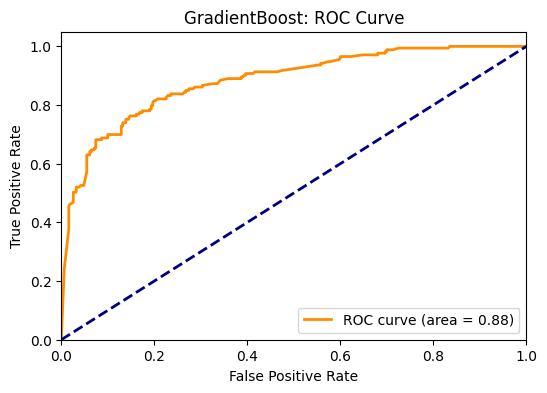

In [51]:
best_model = grid_search_grad.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # Get the probability of the positive class

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Model Test Accuracy: {accuracy:.2f}')
print(f'Best Hyperparameters: {grid_search_grad.best_params_}')

# Calculate ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print(f'ROC AUC: {roc_auc:.2f}')

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GradientBoost: ROC Curve')
plt.legend(loc="lower right")
plt.show()